# Question Two

**A) Reproduce Figure 2 from Shaw and Kennedy (2021) by coding the ODEs in R or Python and integrating them numerically. You don’t need to get the colours exactly right.**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18} #Graph formatting
sns.set(rc=rc) #update dict parameters


#Define gradient function for ode from Shaw Kennedy Paper
def ShawOde(y,t, betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal):
    S, Ia, Ip, Ic, Q, R = y #Unpack state variables from initial condition
    
    #Gradients
    dydt = [-1*(betaA * Ia + betaP * Ip + betaC * Ic)* S, 
            phi * (betaA * Ia + betaP * Ip + betaC * Ic)*S - (gammaA* Ia),
            (1-phi)*(betaA * Ia + betaP * Ip + betaC * Ic)*S - v*Ip,
            v*Ip - (alphaC + gammaC + lambdaVal) * Ic,
            lambdaVal * Ic - (alphaQ + gammaQ)*Q, 
            gammaA * Ia +  gammaC* Ic + gammaQ * Q ]
    return dydt


#Calculate R0 for the Shaw-Kennedy system using the 
#analytic formula derived from the survival function in the paper
def CalcR0(params):
    S = 1
    betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal = params
    term1 = (phi*betaA*S)/(gammaA)
    term2 = ((1-phi)*(betaP)*S)/(v)
    term3 = ((1-phi)*(betaC)*S)/(lambdaVal + alphaC + gammaC)
    
    return(term1+term2+term3)



###PARAMS###
betaA = 0.12
betaP = 0.4
betaC = 0.4

phi = 0.5
v = 0.25

gammaA = 0.1
gammaC = 0.1
gammaQ = 0.1

alphaC = 0.001 
alphaQ = 0.001 

lambdaVal = 0.024

y0 = [1,0.0001,0.0001,0,0,0]
dt = 0.1

###Pack Params###
params = [betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal]

###Get R0 calculation for this set of parameters
R01 = CalcR0(params)

Text(0.5, 1.0, 'R0 =  3.0')

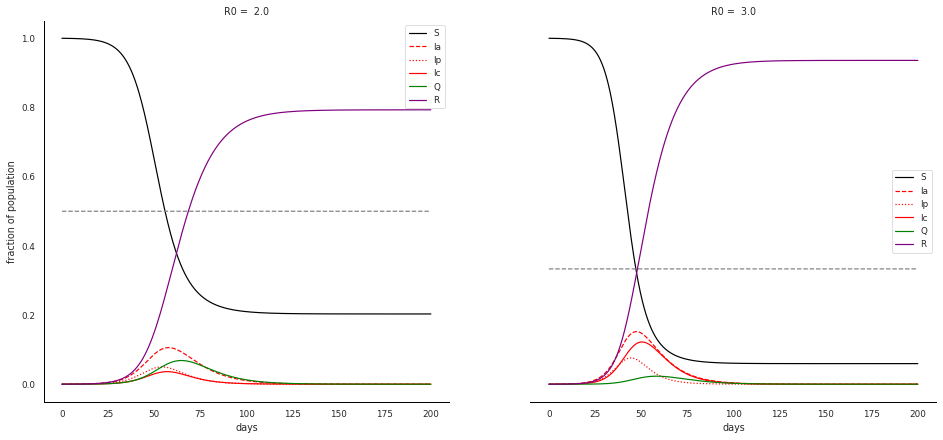

In [15]:
#create time arrays
t  = np.arange(0,200 + dt, dt )
t2 = np.arange(0,200 + dt, dt )


#solve with odeint /// using lsoda 
solODEint   = odeint(ShawOde, y0, t, args = (betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal))

#Change Value of Lambda
lambdaVal = 0.2323232323232323232323232

#Repack params
params = [betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal]

#Calculate R0 for new parameter values (Changed Lambda)
R02 = CalcR0(params)

#Re-solve system with new parameters
solODEint2   = odeint(ShawOde, y0, t, args = (betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal))


#Plotting
sns.set_style("whitegrid", {'axes.grid' : False}) #remove grey grid
sns.set_context("paper") #changes the theme (bunch of style parameters)
plt.rcParams['figure.figsize'] = [16, 7] #changes the size



#Put both plots next to eachother 
fig, ax =plt.subplots(1,2) 

#Plot all the groups in the SECOND model
ax[0].plot(t,solODEint2[:,0], label = "S",  color = "black")
ax[0].plot(t,solODEint2[:,1], label = "Ia", linestyle = "--", color = "red") #style is to match the paper
ax[0].plot(t,solODEint2[:,2], label = "Ip", linestyle = ":", color = "red")
ax[0].plot(t,solODEint2[:,3], label = "Ic", color = "red")
ax[0].plot(t,solODEint2[:,4], label = "Q", color = "green")
ax[0].plot(t,solODEint2[:,5], label = "R",  color = "purple")

#This adds the grey line from the Shaw Kennedy paper to the graph
ax[0].plot(t,(((1/R02))*np.ones(len(t))), color = "grey", linestyle = "--") 


#plot all the groups in the FIRST model
plt.plot(t,solODEint[:,0], label = "S",  color = "black")
plt.plot(t,solODEint[:,1], label = "Ia", linestyle = "--", color = "red")
plt.plot(t,solODEint[:,2], label = "Ip", linestyle = ":", color = "red")
plt.plot(t,solODEint[:,3], label = "Ic", color = "red")
plt.plot(t,solODEint[:,4], label = "Q", color = "green")
plt.plot(t,solODEint[:,5], label = "R",  color = "purple")

#This adds the grey line from the Shaw Kennedy paper to the graph
plt.plot(t,(((1/R01))*np.ones(len(t))), color = "grey", linestyle = "--")

#Add legend and time axis to both
plt.legend(loc='best')
plt.xlabel('days')
plt.ylabel('fraction of population')
ax[0].legend(loc='best')
ax[0].set_xlabel('days')
ax[0].set_ylabel('fraction of population')

#Change some graph aesthetic to match the Shaw Kennedy paper:
ax[1].get_yaxis().set_visible(False)
sns.despine() #remove top and right spines for both
sns.despine(left=True, ax = ax[1]) #remove left spine for right grid
ax[0].spines['left'].set_color('black') #make spines black
ax[0].spines['bottom'].set_color('black')
ax[1].spines['bottom'].set_color('black')

#Set up title string to incorporate variable R_0
Title1 = f"R0 =  {round(R01,2)}"
Title2 = f"R0 =  {round(R02,2)}"

#Add title
ax[0].set_title(Title2)
ax[1].set_title(Title1)

###Final note: When testing, run the whole notebook! Otherwise, the change to lambda in this code
### section will make both graphs identical. 

----

**B) Change the model in some interesting way. See what changes about the model. Explain whether (and why) R0 does or doesn’t change for your modified model, and derive the new value of R0 if it does. A few ideas: add vaccination**

Adding a vaccine modification — simply a flow from the susceptable category straight to the recovered category – as a function of how many people remain susceptable.

Our new gradients:

$$\begin{aligned}
\frac{d S}{d t} &=-\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S - S  Vper\\
\frac{d I_{A}}{d t} &=\varphi\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S-\gamma_{A} I_{A} \\
\frac{d I_{P}}{d t} &=(1-\varphi)\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S-\nu I_{P} \\
\frac{d I_{C}}{d t} &=\nu I_{P}-\left(\alpha_{C}+\gamma_{C}+\lambda\right) I_{C} \\
\frac{d Q}{d t} &=\lambda I_{C}-\left(\alpha_{Q}+\gamma_{Q}\right) Q \\
\frac{d R}{d t} &=\gamma_{A} I_{A}+\gamma_{C} I_{C}+\gamma_{Q} Q + S Vper
\end{aligned}$$


The rate of vaccination is a function of the amount of susceptible people to maintain biological well-posedness. 

Text(0, 0.5, 'fraction of population')

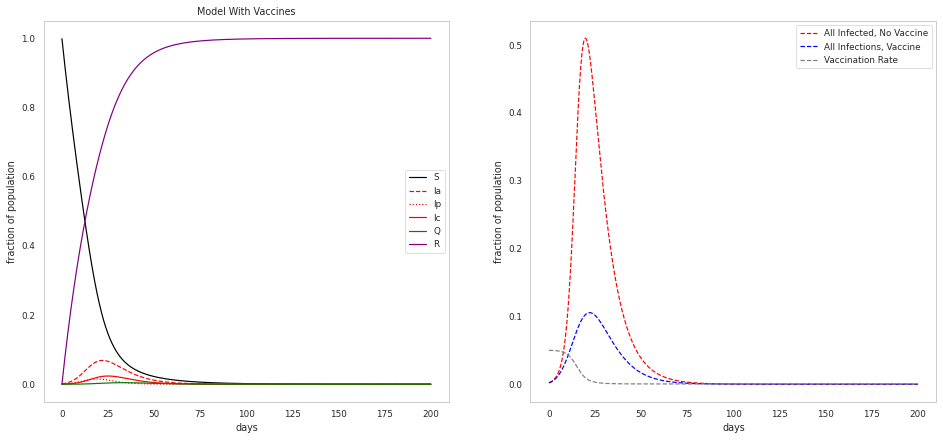

In [16]:
def ShawOdeVaccineSimple(y,t, betaA,betaP,betaC,phi,v, VPer, gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal):
    #This function defines the gradients for a version of the new model 
    #where you vaccinate as a function of susceptable people remaining 
    S, Ia, Ip, Ic, Q, R = y #unpack state variables from initial condition
    
    dydt = [-1*(betaA * Ia + betaP * Ip + betaC * Ic)* S - S*VPer,
            phi * (betaA * Ia + betaP * Ip + betaC * Ic)*S - (gammaA* Ia),
            (1-phi)*(betaA * Ia + betaP * Ip + betaC * Ic)*S - v*Ip,
            v*Ip - (alphaC + gammaC + lambdaVal) * Ic,
            lambdaVal * Ic - (alphaQ + gammaQ)*Q, 
            gammaA * Ia +  gammaC* Ic + gammaQ * Q + S*VPer ]
    return dydt

def ShawOdeVaccineSimple2(y,t, betaA,betaP,betaC,phi,v, VPer, gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal):
    #This function defines the gradients for a version of the new model 
    #where you vaccinate as a function of total infected people in the population
    S, Ia, Ip, Ic, Q, R = y #unpack state variables from initial condition
    
    dydt = [-1*(betaA * Ia + betaP * Ip + betaC * Ic)* S - (Ic+Ia+Ip)*VPer,
            phi * (betaA * Ia + betaP * Ip + betaC * Ic)*S - (gammaA* Ia),
            (1-phi)*(betaA * Ia + betaP * Ip + betaC * Ic)*S - v*Ip,
            v*Ip - (alphaC + gammaC + lambdaVal) * Ic,
            lambdaVal * Ic - (alphaQ + gammaQ)*Q, 
            gammaA * Ia +  gammaC* Ic + gammaQ * Q + (Ic+Ia+Ip)*VPer ]
    return dydt


###PARAMS###
#Transmisibility Params
betaA = 0.3
betaP = 0.8
betaC = 0.8

phi = 0.7

v = 0.25

VPer = 0.05 #Percent of population vaccinated at each timestep assuming everyone is infected

gammaA = 0.1
gammaC = 0.1
gammaQ = 0.1

alphaC = 0.001 
alphaQ = 0.001 

lambdaVal = 0.024

y0 = [0.998,0.001,0.001,0,0,0]
dt = 0.01

#create time array
t  = np.arange(0,200 + dt, dt )
t2 = np.arange(0,200 + dt, dt )

#solve with odeint /// using lsoda 
solODEintVaccine   = odeint(ShawOdeVaccineSimple, y0, t, args = (betaA,betaP,betaC,phi,v, VPer, gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal))

#Get solution with initial model also, with these same params, so we can compare
solODEint   = odeint(ShawOde, y0, t, args = (betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal))

#Plot
fig, ax =plt.subplots(1,2) 

#Plot on right; this is simply the total infected people in the case of a vaccine and in the case of no vaccine
plt.plot(t,solODEint[:,1] + solODEint[:,2] + solODEint[:,3], label = "All Infected, No Vaccine", linestyle = "--", color = "red")
plt.plot(t,solODEintVaccine[:,1] + solODEintVaccine[:,2] + solODEintVaccine[:,3], label = "All Infections, Vaccine", linestyle = "--", color = "blue")
plt.plot(t,(solODEint[:,0] )*VPer, label = "Vaccination Rate", linestyle = "--", color = "grey")
#plt.plot(t,np.cumsum((solODEint[:,0] )*VPer)/t[:-1], label = "Total Percent Vaccinated", linestyle = "--", color = "green")

#Plot on left; this is simply the dynamics of the vaccine model
ax[0].plot(t,solODEintVaccine[:,0], label = "S",  color = "black")
ax[0].plot(t,solODEintVaccine[:,1], label = "Ia", linestyle = "--", color = "red") #style is to match the paper
ax[0].plot(t,solODEintVaccine[:,2], label = "Ip", linestyle = ":", color = "red")
ax[0].plot(t,solODEintVaccine[:,3], label = "Ic", color = "red")
ax[0].plot(t,solODEintVaccine[:,4], label = "Q", color = "green")
ax[0].plot(t,solODEintVaccine[:,5], label = "R",  color = "purple")

#Adding legends and axis labels
plt.legend(loc='best')
plt.xlabel('days')
plt.ylabel('fraction of population')
ax[0].set_title("Model With Vaccines")
ax[0].legend(loc='best')
ax[0].set_xlabel('days')
ax[0].set_ylabel('fraction of population')

Calculating R0 using the Next Generation Matrix method, first we look at the Shaw Kennedy model.

The gradients for the infected compartments are given by:

$$\begin{aligned}
\frac{d I_{A}}{d t} &=\varphi\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S-\gamma_{A} I_{A} \\
\frac{d I_{P}}{d t} &=(1-\varphi)\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S-\nu I_{P} \\
\frac{d I_{C}}{d t} &=\nu I_{P}-\left(\alpha_{C}+\gamma_{C}+\lambda\right) I_{C} \\
\frac{d Q}{d t} &=\lambda I_{C}-\left(\alpha_{Q}+\gamma_{Q}\right) Q \\
\end{aligned}$$

We split this into two operators, $F$ and $V$, which are column vectors representing flow into and out of the compartments (rows) respectively, such that $F - V$ recovers the original system. Next we take the derivative matrix of each, recovering:

$$ dF = \begin{bmatrix} \phi \beta_a S & \phi \beta_p S & \phi \beta_c S & 0 \\
(1 - \phi)  (\beta_a) S & (1 - \phi)  (\beta_p) S & (1 - \phi)  (\beta_c) S & 0 \\
0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{bmatrix}$$

$$ dV= \begin{bmatrix} \gamma_a & 0  & 0  & 0 \\
0 & v & 0 & 0 \\
0 & -v & \alpha_c + \gamma_c + \lambda & 0 \\ 0 & 0 & -\lambda & \alpha_q + \gamma_q  \end{bmatrix}$$

Computing $F V^{-1}$ and looking at the largest eigenvalue, we find $R_0$ for our system. 

This is implemented numerically below, showing this matches the values in the paper. 



In [17]:
def NGRShaw(params, y):
    betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal = params
    S, Ia, Ip, Ic, Q, R = y
    
    ###Calculate Flow in Mat (F)
    dIaIa = phi * (betaA)*S   
    dIaIp = phi * (betaP)*S
    dIaIc = phi * (betaC)*S
    dIaQ  = 0
    
    dIpIa = (1 - phi) * (betaA)* S
    dIpIp = (1 - phi) * (betaP)* S  
    dIpIc = (1 - phi) * (betaC)* S
    dIpQ  = 0 
    
    dIcIa = 0
    dIcIp = 0
    dIcIc = 0
    dIcQ  = 0
    
    dQIa = 0
    dQIp = 0
    dQIc = 0
    dQQ  = 0
    
    matIn = np.matrix([
           [ dIaIa, dIaIp,dIaIc,dIaQ ],
           [ dIpIa, dIpIp,dIpIc,dIpQ ],
           [ dIcIa, dIcIp,dIcIc,dIcQ ],
           [ dQIa, dQIp,dQIc,dQQ ]]) 
    
    
    ###V (flow out) Mat
    dIaIa = (gammaA)
    dIaIp = 0
    dIaIc = 0
    dIaQ  = 0
    
    dIpIa = 0
    dIpIp = (v)
    dIpIc = 0
    dIpQ  = 0 
    
    dIcIa = 0
    dIcIp = -v
    dIcIc = alphaC + gammaC + lambdaVal
    dIcQ  = 0
    
    dQIa = 0
    dQIp = 0
    dQIc = -lambdaVal
    dQQ  = +alphaQ + gammaQ 
    
    matOut = np.matrix([
           [ dIaIa, dIaIp,dIaIc,dIaQ ],
           [ dIpIa, dIpIp,dIpIc,dIpQ ],
           [ dIcIa, dIcIp,dIcIc,dIcQ ],
           [ dQIa, dQIp,dQIc,dQQ ]])
    
    return(matIn, matOut)

In [18]:
#Restate parameters for the Shaw Kennedy model
betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ = [0.12,0.4,0.4,0.5,0.25,0.1,0.1,0.1,0.001,0.001]
lambdaVal = 0.024
y0 = [1,0.0001,0.0001,0,0,0]
dt = 0.1
params = [betaA,betaP,betaC,phi,v,gammaA,gammaC,gammaQ,alphaC,alphaQ, lambdaVal]#Pack Parameters

###R0 using the intial formula given in the paper derived from the survival function
R01 = CalcR0(params)

###Calculate
GetNGRop = NGRShaw(params,y0)
print(max(abs(np.linalg.eigvals(np.matmul(GetNGRop[0],np.linalg.inv(GetNGRop[1])))))) #R0 from next gen matrix
print(R01) #R0 from formula in the Shaw Kennedy paper

3.0000000000000004
3.0


Now, consider the modified system:


$$\begin{aligned}
\frac{d S}{d t} &=-\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S - S Vper\\
\frac{d I_{A}}{d t} &=\varphi\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S-\gamma_{A} I_{A} \\
\frac{d I_{P}}{d t} &=(1-\varphi)\left(\beta_{A} I_{A}+\beta_{P} I_{P}+\beta_{C} I_{C}\right) S-\nu I_{P} \\
\frac{d I_{C}}{d t} &=\nu I_{P}-\left(\alpha_{C}+\gamma_{C}+\lambda\right) I_{C} \\
\frac{d Q}{d t} &=\lambda I_{C}-\left(\alpha_{Q}+\gamma_{Q}\right) Q \\
\frac{d R}{d t} &=\gamma_{A} I_{A}+\gamma_{C} I_{C}+\gamma_{Q} Q + S Vper
\end{aligned}$$

Note that the vaccine flow does not change the gradients for the infected categories, and so the two models have identical Next Generation Matrices, and therefore they have identical R0 values. This is confirmed by numerical simulations of both models, showing that initial rate of growth is equivalent on a timestep of $0.1$ by over five significant figures:

In [19]:
print("Slope, Vaccine, Same Params:",((solODEintVaccine[:,1] + solODEintVaccine[:,2] + solODEintVaccine[:,3])[1] - (solODEintVaccine[:,1] + solODEintVaccine[:,2] + solODEintVaccine[:,3])[0])/dt)
print("Slope, No Vaccine, Same Params:",((solODEint[:,1] + solODEint[:,2] + solODEint[:,3])[1] - (solODEint[:,1] + solODEint[:,2] + solODEint[:,3])[0])/dt)
print("Slope, Slightly Different Params :",((solODEint2[:,1] + solODEint2[:,2] + solODEint2[:,3])[1] - (solODEint2[:,1] + solODEint2[:,2] + solODEint2[:,3])[0])/dt)

Slope, Vaccine, Same Params: 9.993466563598761e-05
Slope, No Vaccine, Same Params: 9.996230736975496e-05
Slope, Slightly Different Params : 4.212497788830656e-05
